In [81]:
# This notebook is used to clean the census and epa data, merge them, and save it as a new csv file

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# importing the census data
census_df = pd.read_csv('census_data/acs_all_tracts_cleaned.csv')

In [84]:
census_df.head(3)

,ID,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,income_35to50k,income_50to75k,income_75to100k,income_100to150k,income_150to200k,income_over200k,income_median,health_ins_tot,health_ins_yes,health_ins_no
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,49.0,194.0,51.0,42.0,33.0,74.0,57399.0,1791.0,1629.0,162.0
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,85.0,159.0,62.0,63.0,46.0,17.0,52176.0,1749.0,1627.0,122.0
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,67.0,285.0,256.0,197.0,49.0,23.0,63704.0,3557.0,3423.0,134.0


In [85]:
census_df.columns

Index(['ID', 'NAME', 'pop_tot', 'pop_white_only', 'pop_black_only',
       'pop_amInd_alNat_only', 'pop_asian_only', 'pop_natHI_PI_only',
       'pop_white', 'pop_black', 'pop_amInd_alNat', 'pop_asian',
       'pop_natHI_PI', 'pop_hispanic_latino_any', 'poverty_tot_white_only',
       'poverty_tot_black_only', 'poverty_tot_amInd_alNat_only',
       'poverty_tot_asian_only', 'poverty_tot_natHI_PI_only',
       'poverty_tot_hispanic_latino_any', 'poverty_below_white_only',
       'poverty_below_black_only', 'poverty_below_amInd_alNat_only',
       'poverty_below_asian_only', 'poverty_below_natHI_PI_only',
       'poverty_below_hispanic_latino_any', 'poverty_below_white_only.1',
       'poverty_perc_black_only', 'poverty_perc_amInd_alNat_only',
       'poverty_perc_asian_only', 'poverty_perc_natHI_PI_only',
       'poverty_perc_hispanic_latino_any', 'industry_tot', 'industry_ag_for',
       'industry_const', 'industry_manu', 'industry_wtrade', 'industry_rtrade',
       'industry_transp', 

In [86]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85395 non-null  int64  
 1   NAME                               85395 non-null  object 
 2   pop_tot                            85395 non-null  float64
 3   pop_white_only                     85395 non-null  float64
 4   pop_black_only                     85395 non-null  float64
 5   pop_amInd_alNat_only               85395 non-null  float64
 6   pop_asian_only                     85395 non-null  float64
 7   pop_natHI_PI_only                  85395 non-null  float64
 8   pop_white                          85395 non-null  float64
 9   pop_black                          85395 non-null  float64
 10  pop_amInd_alNat                    85395 non-null  float64
 11  pop_asian                          85395 non-null  flo

In [87]:
census_df.describe()

,ID,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,pop_amInd_alNat,...,income_35to50k,income_50to75k,income_75to100k,income_100to150k,income_150to200k,income_over200k,income_median,health_ins_tot,health_ins_yes,health_ins_no
count,8.539500e+04,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.00000,85395.000000,85395.000000,...,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,85395.000000,83770.000000,85395.000000,85395.000000,85395.000000
mean,2.837548e+10,3899.956145,2652.178231,488.584378,31.946461,220.026781,7.211218,2904.36323,557.061327,74.327759,...,167.536003,245.600293,186.786299,237.444686,113.667030,137.517009,73797.696085,3842.196627,3505.957035,336.239592
std,1.652800e+10,1716.856744,1506.899369,800.011172,162.987875,464.263274,52.634726,1589.29571,834.592915,189.853162,...,110.693069,146.065610,121.093148,167.687298,111.352622,192.320559,36925.899620,1707.874822,1598.880276,333.955541
min,1.001020e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000
25%,1.301596e+10,2695.000000,1581.500000,28.000000,0.000000,2.000000,0.000000,1785.00000,57.000000,6.000000,...,88.000000,140.000000,100.000000,114.000000,31.000000,20.000000,48732.000000,2647.000000,2384.000000,116.000000
50%,2.804900e+10,3740.000000,2535.000000,152.000000,0.000000,53.000000,0.000000,2786.00000,216.000000,31.000000,...,148.000000,224.000000,167.000000,207.000000,82.000000,65.000000,65805.000000,3688.000000,3343.000000,237.000000
75%,4.201301e+10,4928.000000,3587.000000,582.000000,20.000000,217.000000,0.000000,3892.00000,694.000000,81.000000,...,226.000000,326.000000,252.000000,328.000000,164.000000,175.000000,90313.000000,4867.000000,4454.000000,445.000000
max,7.215375e+10,38223.000000,24707.000000,8780.000000,10382.000000,9745.000000,4071.000000,29652.00000,9029.000000,10624.000000,...,1210.000000,1925.000000,1668.000000,2571.000000,1424.000000,3201.000000,250000.000000,26843.000000,23794.000000,5232.000000


<Axes: >

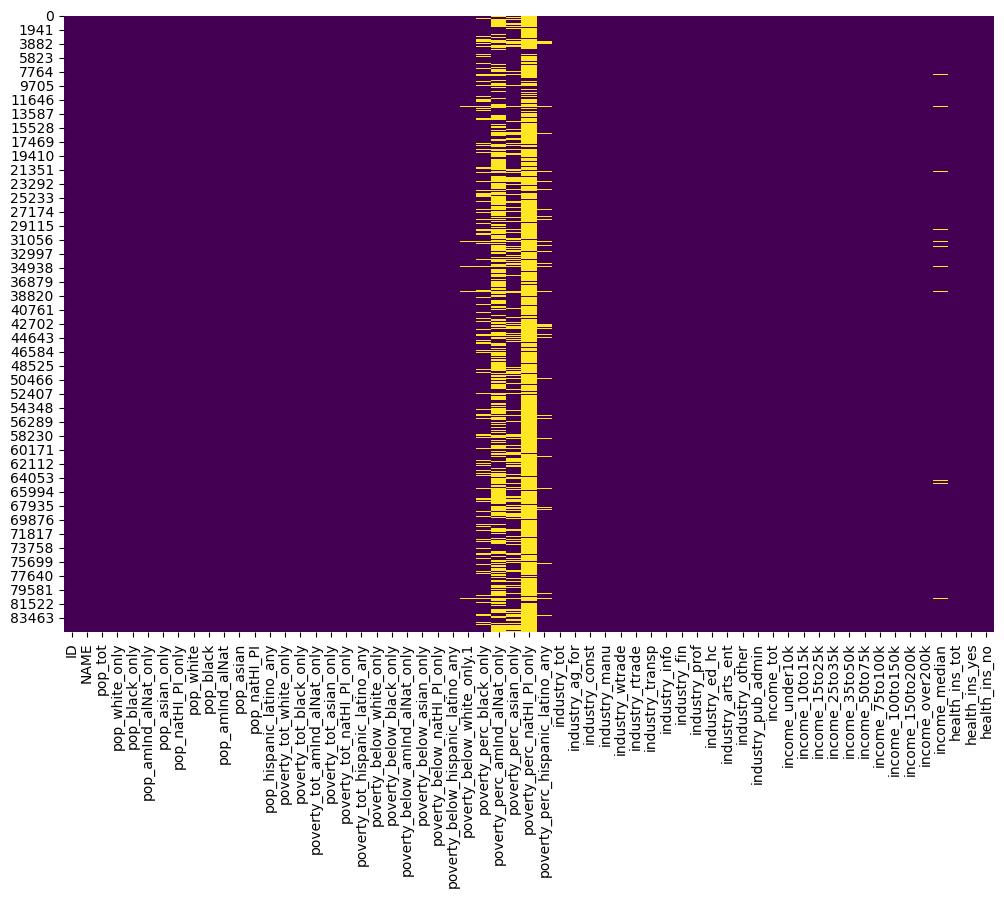

In [88]:
plt.figure(figsize=(12,8))
sns.heatmap(census_df.isnull(), cmap='viridis', cbar=False)

In [89]:
# a lot of data seems to be missing for the columns (~6 columns) in the middle
# and also the 'income_median' has about some missing values
# need to decide what to do with these missing values

In [90]:
# importing the epa data

epa_df = pd.read_csv('epa_data/epa_tracts_continental_us.csv') # pd.read_csv('epa_data/EJSCREEN_2023_Tracts_with_AS_CNMI_GU_VI.csv')

In [91]:
epa_df.head(3)

,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,AREALAND,AREAWATER,PM25,OZONE,...,PS_CANCER,PS_RESP,PS_RSEI_AIR,PS_PTRAF,PS_LDPNT,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS
0,1,1001020100,Alabama,AL,Autauga,4,9825304,28435,9.693224,59.94949,...,65.0,57.0,48,29.0,80,79,32,23,32,87.0
1,2,1001020200,Alabama,AL,Autauga,4,3320818,5669,9.722213,60.02012,...,65.0,57.0,54,68.0,80,81,35,25,72,88.0
2,3,1001020300,Alabama,AL,Autauga,4,5349271,9054,9.743874,59.90393,...,65.0,57.0,56,58.0,35,82,35,27,69,48.0


In [92]:
epa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83482 entries, 0 to 83481
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OID_         83482 non-null  int64  
 1   ID           83482 non-null  int64  
 2   STATE_NAME   83482 non-null  object 
 3   ST_ABBREV    83482 non-null  object 
 4   CNTY_NAME    83482 non-null  object 
 5   REGION       83482 non-null  int64  
 6   AREALAND     83482 non-null  int64  
 7   AREAWATER    83482 non-null  int64  
 8   PM25         83476 non-null  float64
 9   OZONE        83476 non-null  float64
 10  DSLPM        83267 non-null  float64
 11  CANCER       83267 non-null  float64
 12  RESP         83267 non-null  float64
 13  RSEI_AIR     83482 non-null  float64
 14  PTRAF        83066 non-null  float64
 15  PRE1960      83482 non-null  int64  
 16  PRE1960PCT   83482 non-null  float64
 17  PNPL         83482 non-null  float64
 18  PRMP         83482 non-null  float64
 19  PTSD

In [93]:
epa_df.describe()

,OID_,ID,REGION,AREALAND,AREAWATER,PM25,OZONE,DSLPM,CANCER,RESP,...,PS_CANCER,PS_RESP,PS_RSEI_AIR,PS_PTRAF,PS_LDPNT,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS
count,83482.000000,8.348200e+04,83482.000000,8.348200e+04,8.348200e+04,83476.000000,83476.000000,83267.000000,83267.000000,83267.000000,...,83267.000000,83267.000000,83482.000000,83066.000000,83482.000000,83482.000000,83482.000000,83482.000000,83482.000000,81203.000000
mean,42389.932261,2.799137e+10,5.239093,9.169590e+07,2.358266e+06,8.085040,61.706215,0.263686,25.443429,0.309303,...,24.541931,30.143382,49.483997,49.501505,49.191970,49.674469,49.674445,49.674433,47.291955,49.501385
std,24357.688138,1.592449e+10,2.431096,5.014591e+08,2.396642e+07,1.477002,6.027526,0.197830,8.391769,0.104874,...,26.753783,28.563046,28.912644,28.882956,29.499361,28.788123,28.788131,28.788140,30.983752,28.883377
min,1.000000,1.001020e+09,1.000000,2.128300e+04,0.000000e+00,2.390330,42.833960,0.003098,7.000000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21122.250000,1.212624e+10,4.000000,1.736272e+06,0.000000e+00,7.198408,58.135973,0.129961,20.000000,0.200000,...,1.000000,5.000000,24.000000,24.000000,25.000000,25.000000,25.000000,25.000000,20.000000,24.000000
50%,42553.500000,2.803501e+10,5.000000,4.576125e+06,2.231300e+04,8.203379,61.146175,0.218840,20.000000,0.300000,...,14.000000,17.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,48.000000,50.000000
75%,63480.750000,4.200311e+10,7.000000,2.907367e+07,4.310398e+05,9.091244,65.029828,0.336957,30.000000,0.400000,...,43.000000,53.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
max,84414.000000,5.604595e+10,10.000000,2.457861e+10,2.408970e+09,12.137195,100.257230,1.996183,400.000000,4.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<Axes: >

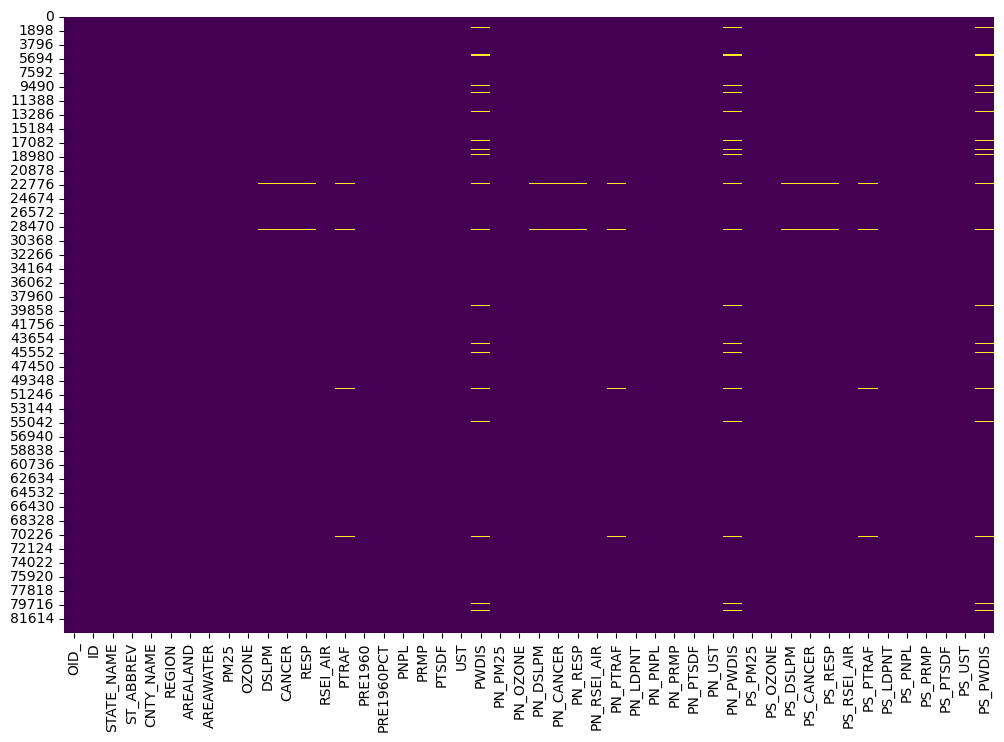

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(epa_df.isnull(), cmap='viridis', cbar=False)

In [95]:
# some data seems to be missing for about 6 columns
# need to decide what to do with these missing values

In [96]:
# Climate Change data

In [97]:
# temperature and labor data
# Hours lost per climate exposed worker per year

temp_labor_df = pd.read_excel('climate_change/temp_labor.xlsx', sheet_name='Labor Hours Lost - Impacts')

In [98]:
temp_labor_df = labor_df[['Unnamed: 0', 'Hours lost per climate exposed worker per year',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',]]

In [99]:
temp_labor_df.columns = ['Tract ID', 'temp_labor_1 deg', 'temp_labor_2 deg', 'temp_labor_3 deg', 'temp_labor_4 deg', 'temp_labor_5 deg']
temp_labor_df.drop(0, axis=0, inplace=True)

In [100]:
temp_labor_df.head(3)

,Tract ID,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg
1,1001020100,11.801866,26.030747,39.215973,52.425672,63.559917
2,1001020200,11.801866,26.030747,39.215973,52.425672,63.559917
3,1001020300,11.801866,26.030747,39.215973,52.425672,63.559917


In [101]:
# temperature and health data
# Change in temperature-related deaths, Deaths/person

temp_health_df = pd.read_excel('climate_change/temp_health.xlsx', sheet_name='Temperature Mortality - Impact')

In [102]:
temp_health_df = temp_health_df[['Unnamed: 0', 'Deaths / Person', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5']]

In [103]:
temp_health_df.columns = ['Tract ID', 'temp_health_1 deg', 'temp_health_2 deg', 'temp_health_3 deg', 'temp_health_4 deg', 'temp_health_5 deg']
temp_health_df.drop(0, axis=0, inplace=True)

In [104]:
temp_health_df.head(3)

,Tract ID,temp_health_1 deg,temp_health_2 deg,temp_health_3 deg,temp_health_4 deg,temp_health_5 deg
1,1009050101,0.000006,0.000018,0.000035,0.000054,0.000092
2,1009050102,0.000006,0.000018,0.000035,0.000054,0.000092
3,1009050200,0.000006,0.000018,0.000035,0.000054,0.000092


In [105]:
len(temp_health_df), len(temp_labor_df)

(23022, 72761)

In [106]:
# temperature and health has a lot less data than temperature and labor
# census and epa have about ~80k rows
# I think I will use the temperature and labor data only for now

In [107]:
# Merging the 3 dataframes

In [108]:
census_df.head(3)

,ID,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,...,income_35to50k,income_50to75k,income_75to100k,income_100to150k,income_150to200k,income_over200k,income_median,health_ins_tot,health_ins_yes,health_ins_no
0,1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,...,49.0,194.0,51.0,42.0,33.0,74.0,57399.0,1791.0,1629.0,162.0
1,1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,...,85.0,159.0,62.0,63.0,46.0,17.0,52176.0,1749.0,1627.0,122.0
2,1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,...,67.0,285.0,256.0,197.0,49.0,23.0,63704.0,3557.0,3423.0,134.0


In [109]:
epa_df.head(3)

,OID_,ID,STATE_NAME,ST_ABBREV,CNTY_NAME,REGION,AREALAND,AREAWATER,PM25,OZONE,...,PS_CANCER,PS_RESP,PS_RSEI_AIR,PS_PTRAF,PS_LDPNT,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS
0,1,1001020100,Alabama,AL,Autauga,4,9825304,28435,9.693224,59.94949,...,65.0,57.0,48,29.0,80,79,32,23,32,87.0
1,2,1001020200,Alabama,AL,Autauga,4,3320818,5669,9.722213,60.02012,...,65.0,57.0,54,68.0,80,81,35,25,72,88.0
2,3,1001020300,Alabama,AL,Autauga,4,5349271,9054,9.743874,59.90393,...,65.0,57.0,56,58.0,35,82,35,27,69,48.0


In [110]:
temp_labor_df.head(3)

,Tract ID,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg
1,1001020100,11.801866,26.030747,39.215973,52.425672,63.559917
2,1001020200,11.801866,26.030747,39.215973,52.425672,63.559917
3,1001020300,11.801866,26.030747,39.215973,52.425672,63.559917


In [111]:
len(census_df), len(epa_df), len(temp_labor_df)

(85395, 83482, 72761)

In [112]:
# the dataframes have different number of rows
# some columns might be left out when merging

In [117]:
merged_df = pd.concat([census_df.set_index('ID'), epa_df.set_index('ID'), temp_labor_df.set_index('Tract ID')], axis=1, join='inner')

In [118]:
len(merged_df)

60967

In [115]:
# seems like there were some non-overlapping rows

In [119]:
merged_df.head(3)

,NAME,pop_tot,pop_white_only,pop_black_only,pop_amInd_alNat_only,pop_asian_only,pop_natHI_PI_only,pop_white,pop_black,pop_amInd_alNat,...,PS_PNPL,PS_PRMP,PS_PTSDF,PS_UST,PS_PWDIS,temp_labor_1 deg,temp_labor_2 deg,temp_labor_3 deg,temp_labor_4 deg,temp_labor_5 deg
1001020100,"Census Tract 201, Autauga County, Alabama",1791.0,1502.0,171.0,0.0,38.0,0.0,1582.0,199.0,47.0,...,79,32,23,32,87.0,11.801866,26.030747,39.215973,52.425672,63.559917
1001020200,"Census Tract 202, Autauga County, Alabama",2010.0,785.0,1088.0,0.0,0.0,0.0,882.0,1175.0,31.0,...,81,35,25,72,88.0,11.801866,26.030747,39.215973,52.425672,63.559917
1001020300,"Census Tract 203, Autauga County, Alabama",3577.0,2433.0,983.0,0.0,26.0,0.0,2457.0,1105.0,0.0,...,82,35,27,69,48.0,11.801866,26.030747,39.215973,52.425672,63.559917


In [120]:
merged_df.to_csv('cenus_epa_climate_merged.csv')